In [161]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler

data = pd.read_csv('data_kmeans.txt',delim_whitespace=True, names=['x1', 'x2'])
data

x1      x2
0    1.84210  4.6076
1    5.65860  4.8000
2    6.35260  3.2909
3    2.90400  4.6122
4    3.23200  4.9399
..       ...     ...
295  7.30280  3.3802
296  6.99200  2.9871
297  4.82550  2.7796
298  6.11770  2.8548
299  0.94049  5.7156

[300 rows x 2 columns]

In [162]:
X = pd.DataFrame(data, columns = ['x1', 'x2'])
X.tail()

x1      x2
295  7.30280  3.3802
296  6.99200  2.9871
297  4.82550  2.7796
298  6.11770  2.8548
299  0.94049  5.7156

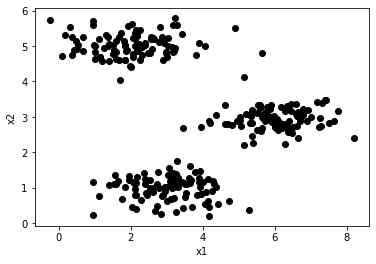

In [163]:
plt.scatter(X["x1"],X["x2"],c="black")
plt.xlabel('x1')
plt.ylabel("x2")
plt.show()

In [164]:
centroids = X.sample(n=3)
centroids

x1      x2
88   0.54845  5.0267
44   1.51780  5.0384
178  1.60520  1.1098

In [165]:
# Normalization
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X)

In [166]:
# Compute K-means clustering
kmeans = KMeans(init="random",n_clusters=3, n_init=300,max_iter=1000, random_state=42)
kmeans.fit(scaled_features)

KMeans(init='random', max_iter=1000, n_clusters=3, n_init=300, random_state=42)

In [167]:
# Cluster index for each sample
kmeans.labels_.size
X["y"] = kmeans.labels_.tolist()
X

x1      x2  y
0    1.84210  4.6076  2
1    5.65860  4.8000  1
2    6.35260  3.2909  1
3    2.90400  4.6122  2
4    3.23200  4.9399  2
..       ...     ... ..
295  7.30280  3.3802  1
296  6.99200  2.9871  1
297  4.82550  2.7796  1
298  6.11770  2.8548  1
299  0.94049  5.7156  2

[300 rows x 3 columns]

In [168]:
# Inverse the scaler to get the centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print(centroids)

[[3.0303364  0.9816663 ]
 [5.99900594 2.96981287]
 [1.98363182 5.03043131]]


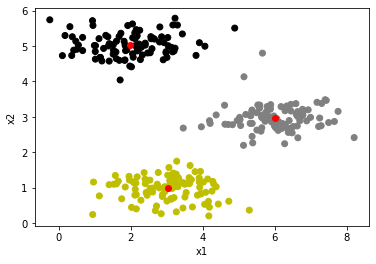

In [169]:
# Plot the results
colors = np.where(X["y"]==0,'y',(np.where(X["y"]==1,'grey','k')))

plt.scatter(X["x1"],X["x2"],c=colors)
plt.scatter(centroids[:,0],centroids[:,1],c="r")
plt.xlabel('x1')
plt.ylabel("x2")
plt.show()

In [176]:
# x1=5 & x2=2 belongs to the grey cluster
kmeans.predict([[5,2]])

array([1])